# Exercise Sheet – Informed Search

## Learning Goals
- Understand how **heuristics** guide search.
- Compare **uninformed** (UCS, BFS) and **informed** (Greedy, A\*) search.
- Observe how heuristics affect **efficiency** and **optimality**.

---

## Exercise 1 – Adding Heuristics to the Graph Example

Use the same weighted graph as in previous exercises:

```python
GRAPH = {
    "Start": {"A": 2, "B": 3, "D": 5},
    "A": {"C": 4},
    "B": {"D": 4},
    "C": {"Goal": 2, "D": 1},
    "D": {"Goal": 5},
    "Goal": {}
}
```  

Implement Greedy Best-First Search, which always expands the node with the lowest heuristic value h(n).



In [96]:
GRAPH = {
    "Start": {"A": 2, "B": 3, "D": 5},
    "A": {"C": 4},
    "B": {"D": 4},
    "C": {"Goal": 2, "D": 1},
    "D": {"Goal": 5},
    "Goal": {}
}

HEURISTIC = {
    'Start': 1,
    'A': 3,
    'B': 2,
    'C': 1, 
    'D': 1,
    'Goal': 0
}

In [97]:
import heapq 

def greedy_search(G, start, goal, h, count=False, verbose=False):
    if count: 
        ctr = 0

    frontier = [(h[start], start, [start], )]
    real_costs = {str(frontier[0]): 0} # keep track of real costs

    while frontier:
        h_cost, node, path = heapq.heappop(frontier)

        if verbose:
            print(f"> Current Frontier: {[(n, c) for c, n, _ in frontier]}")
            print(f"\t>> Current node and path: {node}\t\t\t{path}")

        real_cost = real_costs[str((h_cost, node, path))]

        if node == goal:
            if verbose and count:
                print(f"\nFinished, total visited nodes: {ctr}")

            elif verbose:
                print("Finished")

            return path, real_cost
        
        for child, edge_cost in G[node].items():
            if verbose:
                print(f"\t\t>>> Adding child {child} to frontier")
            if count: 
                ctr += 1

            heapq.heappush(frontier, (h[child], child, path+[child]))
            real_costs[str((h[child], child, path+[child]))] = edge_cost + real_cost

    return None



In [98]:
def ucs_v1(graph, start, goal, verbose=False, count=False):
    """
    Uniform-Cost Search (TREE SEARCH)
    - Expands nodes in order of increasing path cost.
    - Does NOT maintain a visited set, so the same node
      may be expanded multiple times.
    """

    if count:
        ctr = 0

    frontier = [(0, start, [start])]  # (total_cost, node, path)

    while frontier:
        if verbose:
            print("FRONTIER:", [(n, c) for c, n, _ in frontier])
        cost, node, path = heapq.heappop(frontier)
        if verbose:
            print(f"Expanding: {node} | cost={cost} | path={path}")
            
        if node == goal:
            if verbose and count:
                print(f"Goal Reached with {ctr} explorded nodes")
            elif verbose:
                print("Goal reached!\n")
            return path, cost
        for child, edge_cost in graph[node].items():
            if count:
                ctr += 1
            heapq.heappush(frontier, (cost + edge_cost, child, path + [child]))
    return None, float("inf")


In [99]:
(greedy_search(GRAPH, "Start", "Goal", HEURISTIC, True, True))

> Current Frontier: []
	>> Current node and path: Start			['Start']
		>>> Adding child A to frontier
		>>> Adding child B to frontier
		>>> Adding child D to frontier
> Current Frontier: [('B', 2), ('A', 3)]
	>> Current node and path: D			['Start', 'D']
		>>> Adding child Goal to frontier
> Current Frontier: [('B', 2), ('A', 3)]
	>> Current node and path: Goal			['Start', 'D', 'Goal']

Finished, total visited nodes: 4


(['Start', 'D', 'Goal'], 10)

In [100]:
(ucs_v1(GRAPH, "Start", "Goal", True, True))

FRONTIER: [('Start', 0)]
Expanding: Start | cost=0 | path=['Start']
FRONTIER: [('A', 2), ('B', 3), ('D', 5)]
Expanding: A | cost=2 | path=['Start', 'A']
FRONTIER: [('B', 3), ('D', 5), ('C', 6)]
Expanding: B | cost=3 | path=['Start', 'B']
FRONTIER: [('D', 5), ('C', 6), ('D', 7)]
Expanding: D | cost=5 | path=['Start', 'D']
FRONTIER: [('C', 6), ('D', 7), ('Goal', 10)]
Expanding: C | cost=6 | path=['Start', 'A', 'C']
FRONTIER: [('D', 7), ('D', 7), ('Goal', 8), ('Goal', 10)]
Expanding: D | cost=7 | path=['Start', 'A', 'C', 'D']
FRONTIER: [('D', 7), ('Goal', 10), ('Goal', 8), ('Goal', 12)]
Expanding: D | cost=7 | path=['Start', 'B', 'D']
FRONTIER: [('Goal', 8), ('Goal', 10), ('Goal', 12), ('Goal', 12)]
Expanding: Goal | cost=8 | path=['Start', 'A', 'C', 'Goal']
Goal Reached with 10 explorded nodes


(['Start', 'A', 'C', 'Goal'], 8)

> Compare the found path with Uniform-Cost Search (UCS).

With the heuristic we defined previously, it can be seen that UCS will find the optimal path; on the contrary, Greedy Search is not guaranteed to be optimal for every heuristic defined.

> Is the path optimal?

In this case it is not optimal as the real cost of the path found is 10, instead of 8

> How does the number of expanded nodes differ?

There are less expanded nodes with greedy search

## Exercise 2 – A* Search on the Graph

Implement A* Search, where each node is evaluated by:

f(n) = g(n) + h(n)

with

g(n): cost so far (like UCS)

h(n): heuristic estimate to the goal

- Test your A* implementation on the same graph and heuristic from Exercise 1.



In [101]:
# A* implementation
def a_search(G, start, goal, h, verbose, count):
    if count: 
        ctr = 0

    frontier = [(h[start], start, [start], )]
    real_costs = {str(frontier[0]): 0} # keep track of real costs

    while frontier:
        f_cost, node, path = heapq.heappop(frontier)

        if verbose:
            print(f"> Current Frontier: {[(n, c) for c, n, _ in frontier]}")
            print(f"\t>> Current node and path: {node}\t\t\t{path}")
        
        real_cost = real_costs[str((f_cost, node, path))]

        if node == goal:
            if verbose and count:
                print(f"\nFinished, total visited nodes: {ctr}")

            elif verbose:
                print("Finished")

            return path, real_cost
        
        for child, edge_cost in G[node].items():
            if verbose:
                print(f"\t\t>>> Adding child {child} to frontier with cost {edge_cost}")
            if count: 
                ctr += 1

            heapq.heappush(frontier, (f_cost + edge_cost + h[child], child, path+[child]))
            real_costs[str((f_cost+edge_cost+h[child], child, path+[child]))] = edge_cost + real_cost

    return None



In [ ]:
HEURISTIC_admissible = {
    'Start': 1,
    'A': 0,
    'B': 2,
    'C': 1, 
    'D': 1,
    'Goal': 0
} # if we calculate the real costs by hand we can prove that it's admissible

In [103]:
(a_search(GRAPH, "Start", "Goal", HEURISTIC_admissible, True, True))

> Current Frontier: []
	>> Current node and path: Start			['Start']
		>>> Adding child A to frontier with cost 2
		>>> Adding child B to frontier with cost 3
		>>> Adding child D to frontier with cost 5
> Current Frontier: [('B', 6), ('D', 7)]
	>> Current node and path: A			['Start', 'A']
		>>> Adding child C to frontier with cost 4
> Current Frontier: [('D', 7), ('C', 8)]
	>> Current node and path: B			['Start', 'B']
		>>> Adding child D to frontier with cost 4
> Current Frontier: [('C', 8), ('D', 11)]
	>> Current node and path: D			['Start', 'D']
		>>> Adding child Goal to frontier with cost 5
> Current Frontier: [('D', 11), ('Goal', 12)]
	>> Current node and path: C			['Start', 'A', 'C']
		>>> Adding child Goal to frontier with cost 2
		>>> Adding child D to frontier with cost 1
> Current Frontier: [('Goal', 10), ('Goal', 12), ('D', 11)]
	>> Current node and path: D			['Start', 'A', 'C', 'D']
		>>> Adding child Goal to frontier with cost 5
> Current Frontier: [('D', 11), ('Goal', 12

(['Start', 'A', 'C', 'Goal'], 8)

- Does A* find the same path as UCS?

In this case it does find the same path, e.g. A -> C -> Goal with cost 8

- How many nodes does it expand compared to UCS and Greedy Search?

A* explored 9 nodes, meaning that it explored less nodes than UCS (10), however on the other hand Greedy Search explored less nodes (4)



*Experiment*:
Modify the heuristic to make it inadmissible (for example, overestimate one of the distances).
What happens to the optimality of A*?

In [104]:
HEURISTIC_inadmissible = {
    'Start': 1,
    'A': 0,
    'B': 9999999999999999999,
    'C': 9999999999999999999, 
    'D': 1,
    'Goal': 0
} 

(a_search(GRAPH, "Start", "Goal", HEURISTIC_inadmissible, True, True))


> Current Frontier: []
	>> Current node and path: Start			['Start']
		>>> Adding child A to frontier with cost 2
		>>> Adding child B to frontier with cost 3
		>>> Adding child D to frontier with cost 5
> Current Frontier: [('D', 7), ('B', 10000000000000000003)]
	>> Current node and path: A			['Start', 'A']
		>>> Adding child C to frontier with cost 4
> Current Frontier: [('B', 10000000000000000003), ('C', 10000000000000000006)]
	>> Current node and path: D			['Start', 'D']
		>>> Adding child Goal to frontier with cost 5
> Current Frontier: [('B', 10000000000000000003), ('C', 10000000000000000006)]
	>> Current node and path: Goal			['Start', 'D', 'Goal']

Finished, total visited nodes: 5


(['Start', 'D', 'Goal'], 10)

A* is not optimal anymore, behaving more or less like Greedy Search

## Exercise 3 – Heuristics for the Towers of Hanoi (Discussion + Small Test)

Recall your UCS implementation for the Towers of Hanoi.
Now imagine using A* instead.

Propose a simple admissible heuristic for the Hanoi problem.
(Hint: number of disks not yet on the goal peg.)

Explain whether this heuristic would improve performance compared to UCS.
(Would it reduce the number of expanded nodes?)

*Optional*:
Implement a minimal A* variant using your UCS function as a template,
and test it for n = 3.
Report how many nodes were expanded compared to UCS.

**Answer**

A simple heuristic one can come up with is to count the amount of discs which are not present on the goal peg. That is, to subtract $n$ by the amount of pegs on the target peg. Let $n_t(s)$ denote the amount of target pegs of a certain state, then

$$
h(s):=n-n_t(s)
$$

This heuristic could *potentially* improve performance compared to UCS. In fact, we can see that it is consistent as for each legal transition $s, s'$ we have $|h(s)-h(s')| \leq 1$ (since that for each legal move we can move at most one disc, which can either go in the desired stack or out of the desired stack). Note that $1 = \omega(s, s')$ where $\omega$ represents the arch cost; so substituting and resolving absolute values, we obtain
$$
-\omega(s, s') + h(s')\leq h(s) \leq \omega(s, s')+h(s')
$$
So $h(s')\leq h(s) \leq \omega(s, s')+h(s')$, which is exactly the definition of consistency. Therefore, we have that the A\* search with the defined heuristic will not expand more nodes than UCS would do. To verify *how less* nodes it expands, we will verify it experimentally:


In [105]:
from copy import deepcopy
from itertools import product
from collections.abc import Callable

def H(node) -> float:
    """
    IDEA: take the last peg (the 'target peg'), count how many discs are NOT on said peg
    """
    total_discs = 0
    for peg in node:
        total_discs += len(peg)

    target_peg = node[-1]
    l = len(target_peg)

    return total_discs-l
   


def a_hanoi(n, heuristic: Callable, verbose=True, counter=False):
    """
    n is amount of discs

    NOTE: IN THIS IMPLEMENTATION WE ASSUME THE HEURISTIC TO BE A FUNCTION AND IT ACCEPTS LIST OF LISTS
    """

    # generate start and end goal
    start = [[i for i in range(1,n+1)], [], []]
    goal = [[], [], [i for i in range(1, n+1)]]
    
    frontier = [(0, start, [start])]  # (total_cost, node, path)
    ctr = 0 # keep track of amount of visited nodes
    best_cost = {str(start): 0} # hack to fix lists being unhashable: convert list to its string representation

    while frontier:
        ctr += 1

        cost, node, path = heapq.heappop(frontier)

        if node == goal:
            if verbose and counter:
                print(f"Goal reached with {ctr} explored nodes\n")

            elif verbose:
                print(f"Goal reached!\n")

            elif counter:
                return ctr
                
            return path, cost
    
        if cost > best_cost.get(str(node), float("inf")):
            continue

        # explore children 
        for (i,j) in product([0,1,2], [0,1,2]):
                # check if the child is legal or illegal
                if i == j or len(node[i])<=0:
                    continue 

                if len(node[j]) <= 0 or (node[j][0] > node[i][0]): # first condition is necessary to handle empty lists
                    pass

                else:
                    continue


                node_copy = deepcopy(node)

                disc = node_copy[i].pop(0)
                node_copy[j].insert(0, disc)

                if verbose:
                    print(f"Moving disk of size {disc} from peg {i} to peg {j}")
                    print(f"> {node} -> {node_copy}")
                    print()
    
                if cost+1 < best_cost.get(str(node_copy), float("inf")):
                    heapq.heappush(frontier, (cost + 1 + heuristic(node_copy), node_copy, path + [node_copy]))
                    best_cost[str(node_copy)] = cost + 1 + heuristic(node_copy)


    return None, float("inf")


In [106]:
def ucs_hanoi(n, verbose=True, counter=False):
    """
    n is amount of discs

    NOTE: IN THIS IMPLEMENTATION WE ASSUME THE HEURISTIC TO BE A FUNCTION AND IT ACCEPTS LIST OF LISTS
    """

    # generate start and end goal
    start = [[i for i in range(1,n+1)], [], []]
    goal = [[], [], [i for i in range(1, n+1)]]
    
    frontier = [(0, start, [start])]  # (total_cost, node, path)
    ctr = 0 # keep track of amount of visited nodes
    best_cost = {str(start): 0} # hack to fix lists being unhashable: convert list to its string representation

    while frontier:
        ctr += 1
        frontier.sort(reverse=False) 

        cost, node, path = heapq.heappop(frontier)


        if node == goal:
            if verbose and counter:
                print(f"Goal reached with {ctr} explored nodes\n")

            elif verbose:
                print("Goal reached!\n")

            elif counter:
                return ctr
                
            return path, cost
    
        if cost > best_cost.get(str(node), float("inf")):
            continue

        # explore children 
        for (i,j) in product([0,1,2], [0,1,2]):
                # check if the child is legal or illegal
                if i == j or len(node[i])<=0:
                    continue 

                if len(node[j]) <= 0 or (node[j][0] > node[i][0]): # first condition is necessary to handle empty lists
                    pass

                else:
                    continue


                node_copy = deepcopy(node)

                disc = node_copy[i].pop(0)
                node_copy[j].insert(0, disc)

                if verbose:
                    print(f"Moving disk of size {disc} from peg {i} to peg {j}")
                    print(f"> {node} -> {node_copy}")
                    print()
    
                if cost+1 < best_cost.get(str(node_copy), float("inf")):
                    heapq.heappush(frontier, (cost + 1, node_copy, path + [node_copy]))
                    best_cost[str(node_copy)] = cost+1


    return None, float("inf")


In [107]:
a_hanoi(
        3,
        H,
        False,
        True)

20

In [108]:
ucs_hanoi(
        3,
        False,
        True)

20

The amount of explored nodes are the same for $n=3$, which still makes sense as the previous results only explained that the A\* algorithm *cannot be worse* than UCS. To gain more insights, we will try for other values of $n$ (up to $8$)

In [109]:
n_nodes_h = []
n_nodes_nonh = []

from tqdm import tqdm

for i in tqdm(range(2, 8)):
    n_nodes_h.append(a_hanoi(i, H, False, True))
    n_nodes_nonh.append(ucs_hanoi(i, False, True))



100%|██████████| 6/6 [00:00<00:00, 28.68it/s]


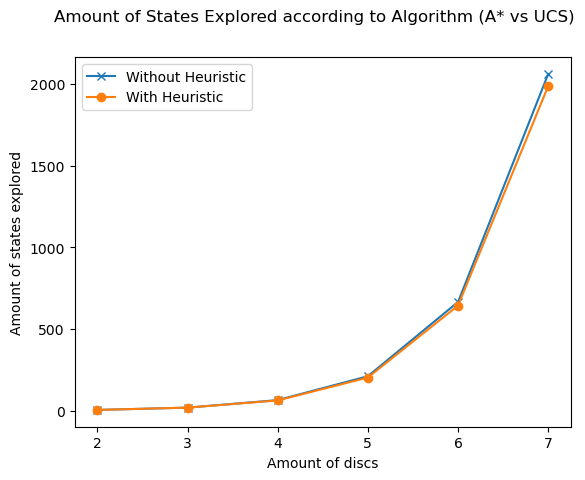

In [110]:
import matplotlib.pyplot as plt 

y = list(range(2, 8))

plt.plot(y, n_nodes_nonh, label="Without Heuristic", marker='x')
plt.plot(y, n_nodes_h, label ="With Heuristic", marker='o')
plt.legend()
plt.xlabel("Amount of discs")
plt.ylabel("Amount of states explored")
plt.suptitle("Amount of States Explored according to Algorithm (A* vs UCS)")
plt.show()

As we can see, the heuristic did not significantly decrease the amount of explored nodes, with minor differences showing only for "sufficiently large" $n$ ($n=5$, for instance)

## Exercise 4 – Reflection

Answer briefly:

- What makes a heuristic admissible and consistent?

**Admissible**: When $h(s) <= h^\ast(s)$ for all $s$, where $h^\ast$ is the *"true cost"* of the node

**Consistent**: Given $\omega(s, s')$ the cost of a legal move from $s$ to $s'$, a heuristic is consistent iff $h(s) \leq \omega(s,s')+h(s')$

- Why does A* guarantee optimality with admissible heuristics?

Because the heuristic won't over-estimate the cost of nodes, which leads the A* algorithm to not "avoid considering" optimal solutions. Let us give a more formal proof with the following:

Suppose that $A$ is the optimal solution node and $B$ is the sub-optimal solution node. Let us denote the costs $f(n)=h(n)+g(n)$ and $h(n) \leq h^\ast(n)$. Let $n \in \text{parent}(A)$, proving that A\* (with the heuristic $h$) is optimal is equivalent to proving the inequalities
$$
f(n) \leq f(A) \leq f(B)
$$

$f(n) \leq f(A)$: By definition

$$
h(n) + g(n) \leq h(A)+ g(A)
$$

Noticing that $h(A)=0$, we have that

$$
h(n)+g(n) \leq g(A)
$$

so

$$
h(n) \leq g(A) - g(n) =: h^\ast(n)
$$

$f(A) \leq f(B)$: Again, by definition this is equivalent to
$$
h(A)+g(A) \leq h(B)+g(B)
$$

being $A, B$ both goal states,

$$
g(A) \leq g(B)
$$

which is true as $A$ is defined as the optimal solution. $\blacksquare$

- When might Greedy Search perform well even though it’s not optimal?

When the heuristic is close enough to the real cost

- How does the choice of heuristic influence the trade-off between optimality and efficiency?

More restrictive (e.g. choosing admissible or consistent heuristics) => The algorithm is guaranteed to be optimal, but is slower as it "acts more like UCS"

Less restrictive (e.g. choosing non-admissible heuristics )=> Faster results but no guarantees on optimality

## Summary

- Greedy Best-First Search: expands nodes with smallest h(n) → fast but not always optimal

- Uniform-Cost Search: expands nodes with smallest g(n) → optimal but slow

- A* Search: expands nodes with smallest f(n) = g(n) + h(n) → optimal and efficient with good heuristics